# 텍스트 전처리(영문)

## 패키지 다운로드

In [2]:
%%time
import nltk
nltk.download("book")
nltk.download("movie_reviews")
nltk.download("punkt")
nltk.download("stopwords")
#NLTK 패키지의 corpus(말뭉치) 서브패키지에서 다양한 연구용 말뭉치를 제공

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\ragnarokv\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\ragnarokv\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\brown.zip.
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     C:\Users\ragnarokv\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\chat80.zip.
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\ragnarokv\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\cmudict.zip.
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     C:\Users\ragnarokv\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\conll2000.zip.
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     C:\Users\ragnarokv\AppData\Roaming\nltk_data

Wall time: 53.3 s


[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ragnarokv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ragnarokv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
nltk.corpus.gutenberg.fileids()
#저작권이 말소된 문학작품을 포함하는 gutenberg 말뭉치

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [7]:
emma_raw = nltk.corpus.gutenberg.raw("austen-emma.txt")
print(emma_raw[:500])

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died t


정규화(Normalization, Regularization): 의미와 쓰임이 같은 단어를 같은 토큰으로 표시
- 대소문자 통합, 어간 추출, 표제어 추출,품사 부착, 불용어

## 토큰화(Tokening)
- corpus를 token이라는 작은 의미단위로 나누는 과정.
- 영어는 주로 단어로 나누고, 한굴은 정규화된 형태소로 나누는 경우가 일반적.
- NLTK의 word_tokenize함수 이용

In [9]:
sent = emma_raw[50:196]
print(sent)

Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence


In [11]:
from nltk.tokenize import word_tokenize
word_tokenize(sent)

['Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a',
 'comfortable',
 'home',
 'and',
 'happy',
 'disposition',
 ',',
 'seemed',
 'to',
 'unite',
 'some',
 'of',
 'the',
 'best',
 'blessings',
 'of',
 'existence']

## 어간추출(stemming)
- 단어를 어간(stem)과 접사(affix)로 분리.
- porter 알고리즘, Lancaster 알고리즘
- NLTK의 PorterStemmer, LancasterStemmer 사용
- 표제어를 추출하기 위한 원시적인 시도 정도.

In [13]:
#stemmer객체를 만든 다음, stem이라는 method를 사용하면 어간만 뽑아낼 수 있음.
from nltk.stem import PorterStemmer, LancasterStemmer

st1 = PorterStemmer()
st2 = LancasterStemmer()

words = ["fly", "flies", "flying", "flew", "flown"]

print("Porter Stemmer : ", [st1.stem(w) for w in words])
print("Lancaster Stemmer : ", [st2.stem(w) for w in words])

Porter Stemmer :  ['fli', 'fli', 'fli', 'flew', 'flown']
Lancaster Stemmer :  ['fly', 'fli', 'fly', 'flew', 'flown']


## 표제어추출(Lemmatization)
- 기본 사전형 단어로 변경.
- be : is, am, are, been
- 사전정보(WordNet) 이용
- NLTK의 WordNetLemmatizer 사용

In [14]:
from nltk.stem import WordNetLemmatizer

lm = WordNetLemmatizer()

[lm.lemmatize(w, pos="v") for w in words]

['fly', 'fly', 'fly', 'fly', 'fly']

## 품사부착 (POS tagging)
- 품사(POS:Part-Of-Speech) : 단어의 쓰임에 따른 구분
- 동일 철자가 다른 품사로 쓰이면, 다른 토큰으로 토큰화
- 앞 뒤 문맥을 보면서 품사를 부착하는 과정
- NLTK의 pos_tag 사용

In [16]:
from nltk.tag import pos_tag

sentence = "Emma refused to permit us to obtain the refuse permit"
tagged_list = pos_tag(word_tokenize(sentence))
tagged_list

[('Emma', 'NNP'),
 ('refused', 'VBD'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

In [20]:
#토큰의 이름을 바로바로 만들어버리는 작업
def tokenizer(doc):
    return ["/".join(p) for p in tagged_list]

tokenizer(sentence)

['Emma/NNP',
 'refused/VBD',
 'to/TO',
 'permit/VB',
 'us/PRP',
 'to/TO',
 'obtain/VB',
 'the/DT',
 'refuse/NN',
 'permit/NN']

In [21]:
#사용하지 않는 말들
from nltk.corpus import stopwords

stopwords.words("english")[:20]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

## 빈도분석
- 두 가지 클래스 사용
- Text 클래스
- FreqDist 클래스

## Text class

In [25]:
#클래스 객체 생성
from nltk import Text

text = Text(word_tokenize(emma_raw)) #원문 자체를 넣는 것이 아니라, 토크나이징 한 것을 넣는다.

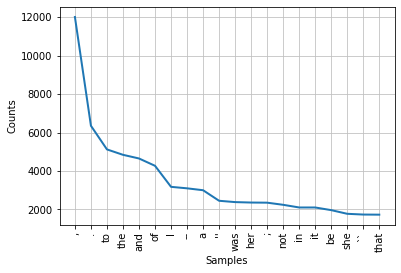

In [27]:
#plot: 단어의 사용 빈도 그래프
from matplotlib import pyplot as plt
text.plot(20) #상위 20개 단어
plt.show()

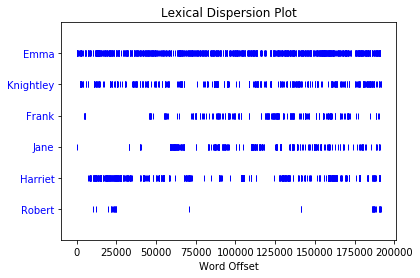

In [29]:
#dispersion_plot: 단어가 사용된 위치를 시각화.
text.dispersion_plot(["Emma", "Knightley", "Frank", "Jane", "Harriet", "Robert"])

In [35]:
#문맥인쇄
#문맥(context): 앞 뒤에 사용된 단어들
text.concordance("Emma")

Displaying 25 of 855 matches:
[ Emma by Jane Austen 1816 ] VOLUME I CHAPT
ane Austen 1816 ] VOLUME I CHAPTER I Emma Woodhouse , handsome , clever , and 
both daughters , but particularly of Emma . Between _them_ it was more the int
 friend very mutually attached , and Emma doing just what she liked ; highly e
r own . The real evils , indeed , of Emma 's situation were the power of havin
ding-day of this beloved friend that Emma first sat in mournful thought of any
ing only half a mile from them ; but Emma was aware that great must be the dif
y . It was a melancholy change ; and Emma could not but sigh over it , and wis
 the rest of her life at Hartfield . Emma smiled and chatted as cheerfully as 
able to tell her how we all are . '' Emma spared no exertions to maintain this
 ' I have a great regard for you and Emma ; but when it comes to the question 
ful , troublesome creature ! '' said Emma playfully . `` That is what you have
e few people who could see faults in Emma Woodhouse , and

In [36]:
#유사 단어 검색: 문맥에서 주어진 단어 대신 사용된 횟수가 높은 단어를 찾음
text.similar("Emma", 1)

she


In [37]:
#공통 문맥 인쇄: 두 단어의 공통 문맥을 찾음
text.common_contexts(["Emma", "she"], 1)

but_was


## FreqDist class
- 사용된 토큰의 빈도를 담는 클래스
- Text 클래스의 vocab method로 추출 가능
- 토큰 리스트를 넣어서 직접 만들 수도 있음.
- 빈도분석에 유용한 여러가지 method 제공
 - N: 빈도(횟수)
 - freq: 빈도(퍼센트)
 - most_common: 가장 많이 나온 단어
 - plot: most_common plot

In [38]:
#Text 클래스에서 생성
fd = text.vocab()
type(fd)

nltk.probability.FreqDist

In [39]:
#토큰 리스트에서 생성
from nltk import FreqDist

stopwords = ["Mr.", "Mrs.", "Miss", "Mrs", "Dear"]
emma_tokens = pos_tag(word_tokenize(emma_raw)) #pos_tagging 결과 단어와 품사가 튜플 리스트로  나타남
names_list = [t[0] for t in emma_tokens if t[1] == "NNP" and t[0] not in stopwords] #품사(t[1])가 NNP(사람이름)이고 stopwords가 아닌 것들을 뽑아 이름 리스트 생성
fd_names = FreqDist(names_list) #이름에 대한 distribution을 생성

In [40]:
fd_names
#FreqDist 클래스는 단어를 key, 빈도를 value로 가지는 DIct와 유사.

FreqDist({'Emma': 829, 'Harriet': 477, 'Weston': 429, 'Elton': 374, 'Knightley': 373, 'Woodhouse': 307, 'Jane': 295, 'Fairfax': 232, 'Churchill': 213, 'Frank': 207, ...})

In [41]:
#Emma의 출현 횟수, 확률 계산
fd_names.N(), fd_names["Emma"], fd_names.freq("Emma")

(6986, 829, 0.11866590323504152)

In [42]:
#most_common method 이용하면 가장 출현 횟수가 높은 단어 찾음
fd_names.most_common(5)

[('Emma', 829),
 ('Harriet', 477),
 ('Weston', 429),
 ('Elton', 374),
 ('Knightley', 373)]

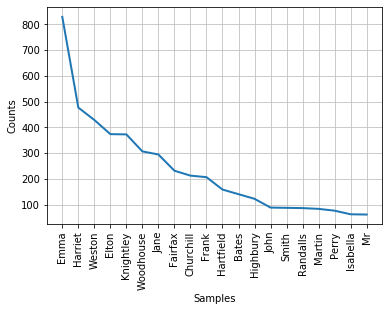

In [44]:
fd_names.plot(20)
plt.show()

## 워드클라우드(wordcdloud)
- wordcloud  패키지를 이용
- 단어의 사용 빈도수에 따라 Word Cloud 시각화를 할 수 있음.
- 단어가 많이 나오면 크게, 적게 나오면 작게 시각화
- pip wordcloud

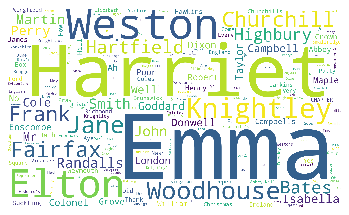

In [51]:
from wordcloud import WordCloud

wc = WordCloud(width=1000, height=600, background_color="White", random_state=0)
plt.imshow(wc.generate_from_frequencies(fd_names))
plt.axis("off")
plt.show()